## 2018 Housing Survey of West Bloomington

The City of Bloomington receives federal pass-through dollars in the form of Community Development Block Grant funds. These funds are managed by the city and are granted to individuals, non-profit organizations and businesses within slum and blighted neighborhoods for a variety of property improvements and program support.

To qualify for CDBG money, the City must demonstrate that it has neighborhoods in need of revitalization. This is done by completing a Building & Conditions Report every 10 years, to establish and continue funding.

The first Building and Conditions (B&C) report was completed in 2008. During the summer of 2018, an IWU intern named Benjamin Nielsen worked with the IWU Action Research Center and the City of Bloomington to complete the second B&C survey of West Bloomington. His data collection secured continued funding for CDBG funds. This data is publically available and can be analyzed by anyone interested in generating insights from the data. 





###Rating
## **1** - Excellent, **2** - Good, **3** - Fair, **4** - Poor 

#Research goals:

Use visualizations to identify which areas within West Bloomington have the most urgent need for revitalizatin. This could be achieved by a Choropleth map using Geopandas. For this, we would have to look how where each component of a property is rated the worst (poor or critical) so we can identify where we'd need to focus further research on if we want to revitalize roof, foundation or gutter, for example. *Since I have the addresses of most properties, I could potentially make the maps by finding out latitudes and longitudes of all the properties.* Other goals of my project are to see if


*   the north side properties are doing better than south or vice versa
*   is there a trend between propeties located east to west or north to south
*   is there any one part of the property that has the lowest/same score across the entire street
*   check what other recreational facilities or stores are located in the area and how they are helping with revitalization in this part of the town




#Imports

In [0]:
# Code by: Eva Nautiyal
# Class: Applied Data Analysis
# Fall 2019

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 120

import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## Creating Dataframe

In [0]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1SEI9P_qNzOOQj2uwO6wEsTLjp_TIHlpg0kpqWHeRNfo/edit#gid=924858711'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)

# check dataframe
df.head()

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
0,12805,1,3,3,3.0,3,3,3,2,3,2.0,3,3,2.0,408 N LEE,NaN
1,12806,1,2,4,3.0,2,2,3,3,2,2.0,2,2,1.0,508 N LEE,NaN
2,12807,1,2,3,2.0,3,2,2,2,0,2.0,2,2,2.0,510 N LEE,NaN
3,12808,1,2,2,NaN,2,2,2,2,2,2.0,2,2,0.0,611 N LEE,NaN
4,13205,1,3,2,0.0,2,2,2,2,3,2.0,2,0,2.0,412 N LEE,NaN


## Verifying Data
There are several missing values in our data because the rated object either does not exist, e.g. gutter or there was an error when entering the hand-written data into digital copies. The properties that do not have a gutter have no score. This is subsequently changed to 4 because no gutter means a bad gutter *which is critical*.


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 16 columns):
c                       516 non-null int64
Type_                   516 non-null int64
PublicSidewalk          516 non-null int64
Roof                    516 non-null int64
Chimney                 514 non-null float64
Gutter                  516 non-null int64
Siding                  516 non-null int64
Windows                 516 non-null int64
Screens                 516 non-null int64
EntryStairs             516 non-null int64
Porch                   515 non-null float64
Foundation              516 non-null int64
Sidewalk                516 non-null int64
Driveway                506 non-null float64
Address                 512 non-null object
AccessStructureType2    78 non-null object
dtypes: float64(3), int64(11), object(2)
memory usage: 64.6+ KB


In [0]:
#checking how many missing values exist
df.isna().sum()

c                         0
Type_                     0
PublicSidewalk            0
Roof                      0
Chimney                   2
Gutter                    0
Siding                    0
Windows                   0
Screens                   0
EntryStairs               0
Porch                     1
Foundation                0
Sidewalk                  0
Driveway                 10
Address                   4
AccessStructureType2    438
dtype: int64

#NaN policy and Data Entry Errors

This data was taken on paper and the form originally consisted of checkboxes labelled from 1 to 4 for each propetry to be rated. It was done during the summer of 2018 by a group of Illinois Wesleyan students and staff member. The data was then handed over to the City of Bloomington, where a "middleman" entered this data digitally. The excel files were then made available for analysis. Somewhere in this data entry process, people in charge of recording the data decided to enter either 0 or simply made some data entry errors.

Note that when NaNs are dropped for subsequent analysis, we lose a huge amount of data.

In [0]:
#replacing 0 with Nan for consistency
df.replace(0, np.nan, inplace=True)
df

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2
0,12805,1,3,3.0,3.0,3.0,3,3,2.0,3.0,2.0,3.0,3.0,2.0,408 N LEE,NaN
1,12806,1,2,4.0,3.0,2.0,2,3,3.0,2.0,2.0,2.0,2.0,1.0,508 N LEE,NaN
2,12807,1,2,3.0,2.0,3.0,2,2,2.0,NaN,2.0,2.0,2.0,2.0,510 N LEE,NaN
3,12808,1,2,2.0,NaN,2.0,2,2,2.0,2.0,2.0,2.0,2.0,NaN,611 N LEE,NaN
4,13205,1,3,2.0,NaN,2.0,2,2,2.0,3.0,2.0,2.0,NaN,2.0,412 N LEE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,76010,1,2,2.0,NaN,2.0,2,2,3.0,2.0,2.0,2.0,2.0,2.0,710 W. Locust St.,NaN
512,76011,1,2,2.0,2.0,2.0,2,2,2.0,2.0,2.0,2.0,NaN,2.0,810 W. Locust St.,Shed
513,76013,1,2,3.0,3.0,2.0,2,2,2.0,3.0,2.0,2.0,NaN,4.0,808 W. Grove St.,NaN
514,76014,1,2,2.0,3.0,2.0,2,2,2.0,2.0,NaN,2.0,2.0,3.0,807 W. Olive St.,NaN


In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
c,516.0,44609.341085,19213.478611,12805.0,27211.75,44010.5,61613.25,76015.0
Type_,516.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
PublicSidewalk,516.0,2.085271,0.729740,1.0,2.00,2.0,2.00,4.0
Roof,511.0,2.428571,0.786083,1.0,2.00,2.0,3.00,4.0
Chimney,348.0,2.603448,0.742447,1.0,2.00,3.0,3.00,4.0
Gutter,503.0,2.522863,0.807691,1.0,2.00,2.0,3.00,4.0
Siding,516.0,2.428295,0.758572,1.0,2.00,2.0,3.00,4.0
Windows,516.0,2.447674,0.772824,1.0,2.00,2.0,3.00,4.0
Screens,479.0,2.576200,0.824531,1.0,2.00,2.0,3.00,4.0
EntryStairs,493.0,2.482759,0.817869,1.0,2.00,2.0,3.00,4.0


##Overall Structure Ranking
Overall structure ranking is used to measure the overall conditions of houses in Bloomington. According to the 2008 Buildings and Conditions Report, the weight is distributed amongst all components in the following way.

The building component rankings were weighted for the overall structure ranking
based on the components importance to the structural integrity of the building. The most important components, vital to structural integrity, included: foundation, roof, exterior walls, and windows; these components were weighted to contribute to 90% of the structures overall ranking. The weight of the components rankings are listed below in percentages:

1. Foundation: 30%

2. Roof: 30%

3. Siding: 20%

4. Windows: 10%

5. Porch: 2%

6. Porch Steps: 2%

7. Screens/Storms: 1%

8. Chimney Tower: 1%

9. Guttering: 1%

10. Accessory Structure: 1%

11. Garage: 1%

12. Sidewalk/Drive: 1%

Total: 100%

The overall ranking was calculated (see equation below) by multiplying the components rank by its assigned weight. Each weighted ranking was totaled and divided by the total of potential weights.

Because we don't have an exterior wall rating for 2018 data, we will distribute the weight of that component.  Option: make Foundation and Roof 40% each 


##Add variables with weighted scores to the table 

In [0]:
#creating weighted variables and use fillna function to fill the missing values with mean in each column
weightedlist = ['FoundationW', 'RoofW', 'WindowsW', 'SidingW', 'PorchW', 'ChimneyW', 'GutterW', 'EntryStairsW', 'SidewalkW', 'ScreensW']

df['FoundationW'] = df['Foundation'].fillna(df['Foundation'].mean()) * 0.30
df['RoofW'] = df['Roof'].fillna(df['Roof'].mean())*0.30
df['SidingW'] = df['Siding'].fillna(df['Siding'].mean())*0.20
df['WindowsW'] = df['Windows'].fillna(df['Windows'].mean())*0.10
df['PorchW'] = df['Porch'].fillna(df['Porch'].mean())*0.02
df['EntryStairsW'] = df['EntryStairs'].fillna(df['EntryStairs'].mean())*0.02
df['ScreensW'] = df['Screens'].fillna(df['Screens'].mean())*0.01
df['ChimneyW'] = df['Chimney'].fillna(df['Chimney'].mean())*0.01
df['GutterW'] = df['Gutter'].fillna(df['Gutter'].mean())*0.01
df['SidewalkW'] = df['Sidewalk'].fillna(df['Sidewalk'].mean())*0.01

df[weightedlist].isna().sum()

FoundationW     0
RoofW           0
WindowsW        0
SidingW         0
PorchW          0
ChimneyW        0
GutterW         0
EntryStairsW    0
SidewalkW       0
ScreensW        0
dtype: int64

####SumW is another column which is calculated out of 4. Note that the properties were rated best to worst as 1 to 4.


In [0]:
df['sumW'] = df[weightedlist].sum(axis=1)

df['sumW'].describe()

count    516.000000
mean       2.416009
std        0.578291
min        0.996034
25%        1.981117
50%        2.310000
75%        2.767864
max        3.920000
Name: sumW, dtype: float64

##Calculating the percentage of properties rated in each category

In [0]:
percent = df.columns[2:-13]
percent

for p in percent: 
    df_pvt = (df[p].value_counts(normalize=True) * 100).round()
    print(df_pvt)

2    63.0
1    17.0
3    14.0
4     6.0
Name: PublicSidewalk, dtype: float64
2.0    53.0
3.0    28.0
4.0    11.0
1.0     7.0
Name: Roof, dtype: float64
2.0    46.0
3.0    39.0
4.0    12.0
1.0     3.0
Name: Chimney, dtype: float64
2.0    52.0
3.0    28.0
4.0    15.0
1.0     5.0
Name: Gutter, dtype: float64
2    55.0
3    28.0
4    10.0
1     6.0
Name: Siding, dtype: float64
2    56.0
3    27.0
4    12.0
1     6.0
Name: Windows, dtype: float64
2.0    45.0
3.0    33.0
4.0    15.0
1.0     6.0
Name: Screens, dtype: float64
2.0    56.0
3.0    24.0
4.0    15.0
1.0     6.0
Name: EntryStairs, dtype: float64
2.0    44.0
3.0    36.0
4.0    13.0
1.0     7.0
Name: Porch, dtype: float64
2.0    52.0
3.0    35.0
4.0    10.0
1.0     3.0
Name: Foundation, dtype: float64
2.0    49.0
3.0    25.0
4.0    19.0
1.0     6.0
Name: Sidewalk, dtype: float64
2.0    43.0
3.0    27.0
4.0    27.0
1.0     4.0
Name: Driveway, dtype: float64


##**Poor Properties (including critical)**



In [0]:
poor = df['sumW'] > 3
poor.value_counts()

False    433
True      83
Name: sumW, dtype: int64

In [0]:
poor = df['sumW'] > 3
df[poor]

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
29,16405,1,2,4.0,NaN,3.0,3,4,NaN,NaN,NaN,3.0,4.0,3.0,901 w washington,NaN,0.9,1.200000,0.6,0.4,0.051117,0.049655,0.025762,0.026034,0.030000,0.040000,3.322569
37,18412,1,2,4.0,3.0,4.0,4,2,2.0,4.0,4.0,3.0,4.0,3.0,519 W GROVE,NaN,0.9,1.200000,0.8,0.2,0.080000,0.080000,0.020000,0.030000,0.040000,0.040000,3.390000
44,18807,1,2,NaN,3.0,NaN,3,3,3.0,4.0,4.0,4.0,3.0,4.0,518 W GROVE,NaN,1.2,0.728571,0.6,0.3,0.080000,0.080000,0.030000,0.030000,0.025229,0.030000,3.103800
51,19214,1,2,4.0,4.0,4.0,4,4,4.0,3.0,3.0,4.0,NaN,2.0,812 w Washington,Fence,1.2,1.200000,0.8,0.4,0.060000,0.060000,0.040000,0.040000,0.040000,0.025711,3.865711
78,21209,1,2,4.0,3.0,3.0,3,3,4.0,2.0,3.0,3.0,2.0,3.0,605 W GROVE,Shed,0.9,1.200000,0.6,0.3,0.060000,0.040000,0.040000,0.030000,0.030000,0.020000,3.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,67611,1,2,4.0,NaN,4.0,4,3,3.0,2.0,NaN,3.0,4.0,NaN,915 W Grove St,NaN,0.9,1.200000,0.8,0.3,0.051117,0.040000,0.030000,0.026034,0.040000,0.040000,3.427152
445,69610,1,2,3.0,2.0,3.0,3,3,3.0,4.0,NaN,4.0,2.0,4.0,925 W Grove St,NaN,1.2,0.900000,0.6,0.3,0.051117,0.080000,0.030000,0.020000,0.030000,0.020000,3.231117
458,70815,1,3,3.0,3.0,4.0,4,3,4.0,3.0,NaN,4.0,3.0,2.0,615 W. Mulberry St.,NaN,1.2,0.900000,0.8,0.3,0.051117,0.060000,0.040000,0.030000,0.040000,0.030000,3.451117
466,71209,1,4,4.0,3.0,4.0,3,2,2.0,2.0,2.0,3.0,4.0,4.0,506 N. Mason st.,NaN,0.9,1.200000,0.6,0.2,0.040000,0.040000,0.020000,0.030000,0.040000,0.040000,3.110000


##**Critical Properties**

Critical properties with worst weighted sum.


In [0]:
critical = df['sumW'] > 3.5
df[critical]

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
51,19214,1,2,4.0,4.0,4.0,4,4,4.0,3.0,3.0,4.0,NaN,2.0,812 w Washington,Fence,1.2,1.2,0.8,0.4,0.060000,0.060000,0.040000,0.040000,0.04,0.025711,3.865711
100,25211,1,2,3.0,NaN,3.0,4,4,4.0,4.0,NaN,4.0,NaN,4.0,301 S Low,NaN,1.2,0.9,0.8,0.4,0.051117,0.080000,0.040000,0.026034,0.03,0.025711,3.552863
104,25610,1,2,4.0,NaN,4.0,3,4,NaN,4.0,4.0,4.0,NaN,NaN,302 S Allin,NaN,1.2,1.2,0.6,0.4,0.080000,0.080000,0.025762,0.026034,0.04,0.025711,3.677508
115,26009,1,4,4.0,NaN,4.0,4,4,4.0,4.0,4.0,4.0,4.0,4.0,306 S Low,NaN,1.2,1.2,0.8,0.4,0.080000,0.080000,0.040000,0.026034,0.04,0.040000,3.906034
116,26010,1,3,4.0,3.0,4.0,3,3,3.0,4.0,4.0,4.0,4.0,4.0,814 W Front,NaN,1.2,1.2,0.6,0.3,0.080000,0.080000,0.030000,0.030000,0.04,0.040000,3.600000
133,28008,1,1,4.0,3.0,4.0,3,4,4.0,3.0,NaN,4.0,2.0,NaN,901 w Jefferson,NaN,1.2,1.2,0.6,0.4,0.051117,0.060000,0.040000,0.030000,0.04,0.020000,3.641117
137,28409,1,2,3.0,4.0,4.0,4,4,4.0,4.0,4.0,4.0,2.0,2.0,304 N Allin,NaN,1.2,0.9,0.8,0.4,0.080000,0.080000,0.040000,0.040000,0.04,0.020000,3.600000
141,29209,1,2,4.0,4.0,4.0,3,3,4.0,4.0,4.0,4.0,3.0,NaN,706 W Jefferson,NaN,1.2,1.2,0.6,0.3,0.080000,0.080000,0.040000,0.040000,0.04,0.030000,3.610000
186,33610,1,2,4.0,4.0,3.0,4,4,4.0,2.0,2.0,4.0,2.0,NaN,708 W Jefferson,NaN,1.2,1.2,0.8,0.4,0.040000,0.040000,0.040000,0.040000,0.03,0.020000,3.810000
187,33611,1,2,4.0,3.0,4.0,4,4,3.0,2.0,3.0,3.0,2.0,3.0,605 W Jefferson,NaN,0.9,1.2,0.8,0.4,0.060000,0.040000,0.030000,0.030000,0.04,0.020000,3.520000


##Separating data into new dataframes based on street address

In [0]:
streetlist = ['mul', 'lee', 'monroe', 'grove', 'washington', 'allin', 'low', 'taylor', 'olive', 'jefferson', 'oak', 'front', 'howard', 'catherine', 'market', 'mason', 'locust']

mulberry = df[df['Address'].str.contains('Mulberry', na=False, case=False).dropna()]
lee = df[df['Address'].str.contains('LEE', na=False, case=False).dropna()]
monroe = df[df['Address'].str.contains('Monroe', na=False, case=False).dropna()]
grove = df[df['Address'].str.contains('GROVE', na=False, case=False).dropna()]
washington = df[df['Address'].str.contains('Washington', na=False, case=False).dropna()]
allin = df[df['Address'].str.contains('Allin', na=False, case=False).dropna()]
low = df[df['Address'].str.contains('Low', na=False, case=False).dropna()]
taylor = df[df['Address'].str.contains('Taylor', na=False, case=False).dropna()]
olive = df[df['Address'].str.contains('Olive', na=False, case=False).dropna()]
jefferson = df[df['Address'].str.contains('Jefferson', na=False, case=False).dropna()]
oak = df[df['Address'].str.contains('Oak', na=False, case=False).dropna()]
front = df[df['Address'].str.contains('Front', na=False, case=False).dropna()]
howard = df[df['Address'].str.contains('Howard', na=False, case=False).dropna()]
catherine = df[df['Address'].str.contains('Catherine', na=False, case=False).dropna()]
market = df[df['Address'].str.contains('Market', na=False, case=False).dropna()]
morris = df[df['Address'].str.contains('Morris', na=False, case=False).dropna()]
mason = df[df['Address'].str.contains('Mason', na=False, case=False).dropna()]
locust = df[df['Address'].str.contains('Locust', na=False, case=False).dropna()]

dfstreet = pd.DataFrame(streetlist)


In [0]:
lee = lee.assign(Address='lee')
mulberry = mulberry.assign(Address='mul')
monroe = monroe.assign(Address='monroe')
olive = olive.assign(Address='olive')
allin = allin.assign(Address='allin')
oak = oak.assign(Address='oak')
market = market.assign(Address='market')
morris = morris.assign(Address='morris')
mason = lee.assign(Address='mason')
jefferson = jefferson.assign(Address='jeff')
front = front.assign(Address='front')
catherine = lee.assign(Address='catherine')
locust = locust.assign(Address='locust')
taylor = taylor.assign(Address='taylor')
low = low.assign(Address='low')
washington = washington.assign(Address='washington')
howard = howard.assign(Address='howard')
grove = grove.assign(Address='grove')


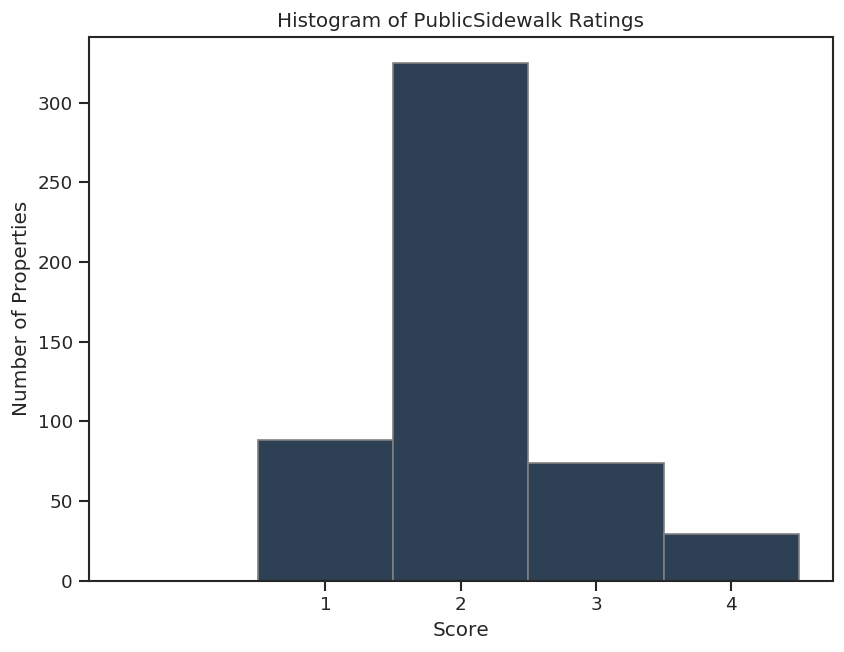

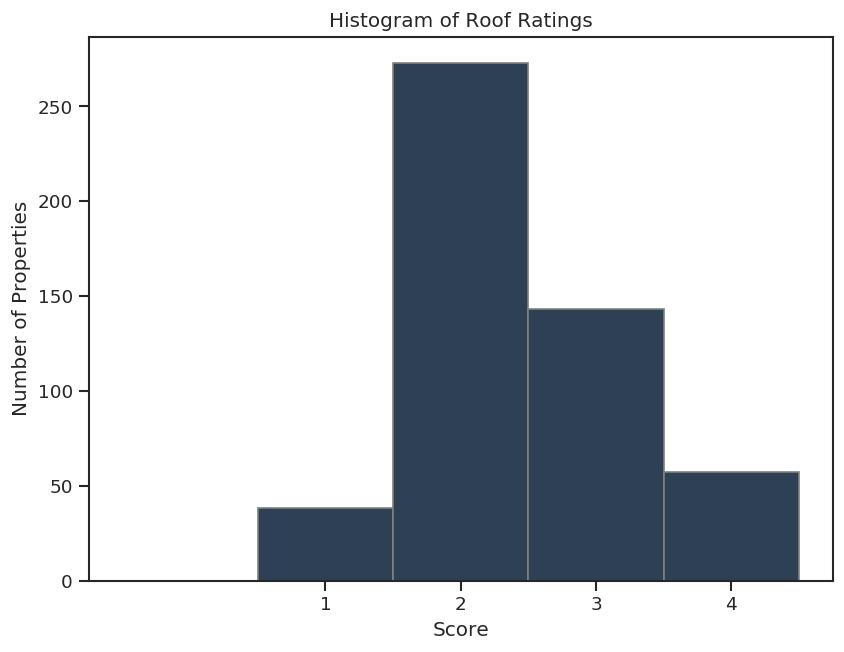

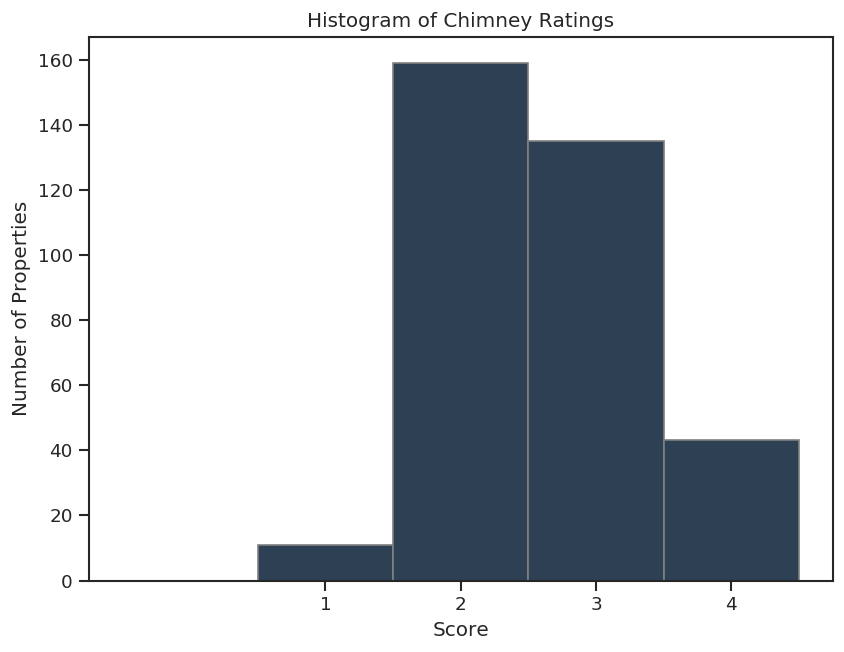

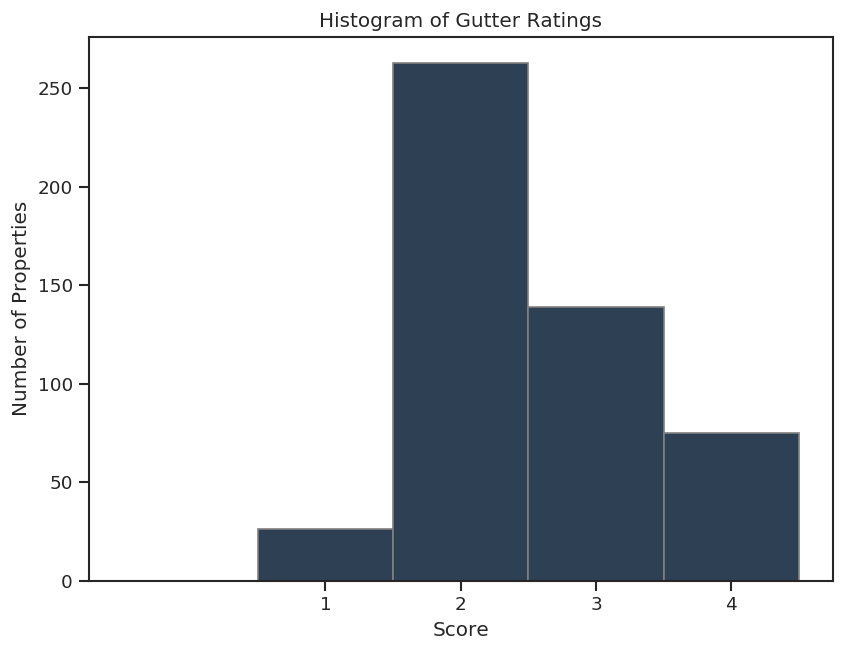

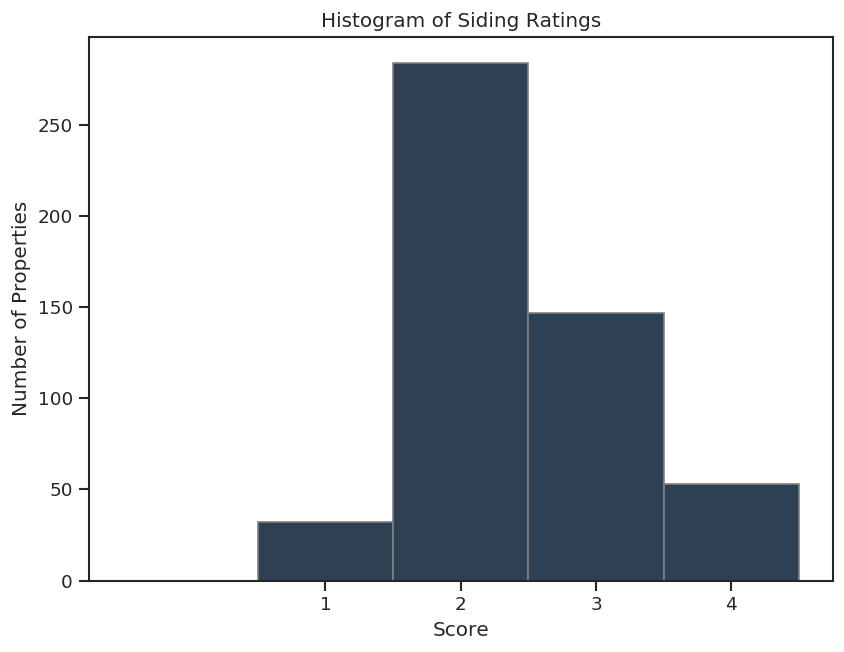

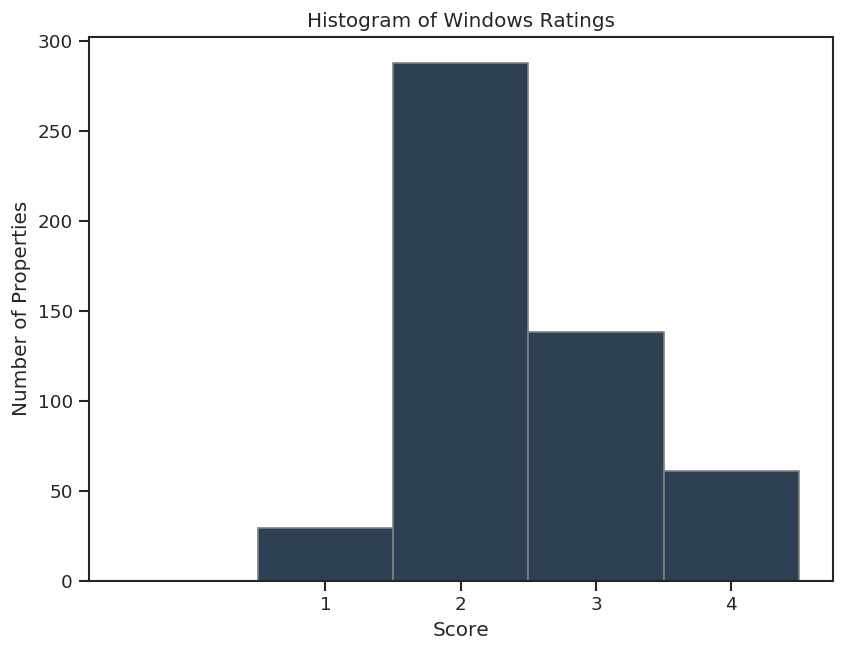

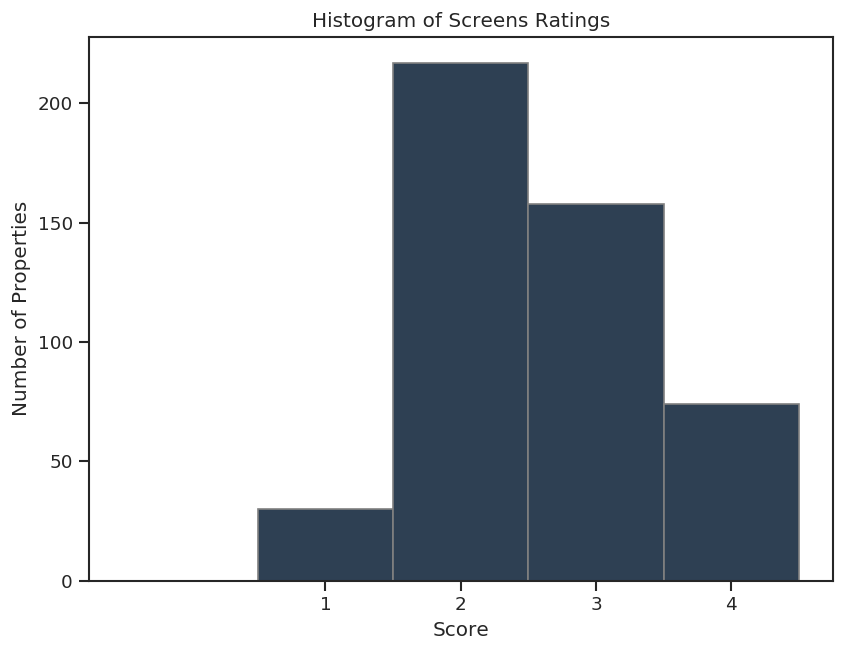

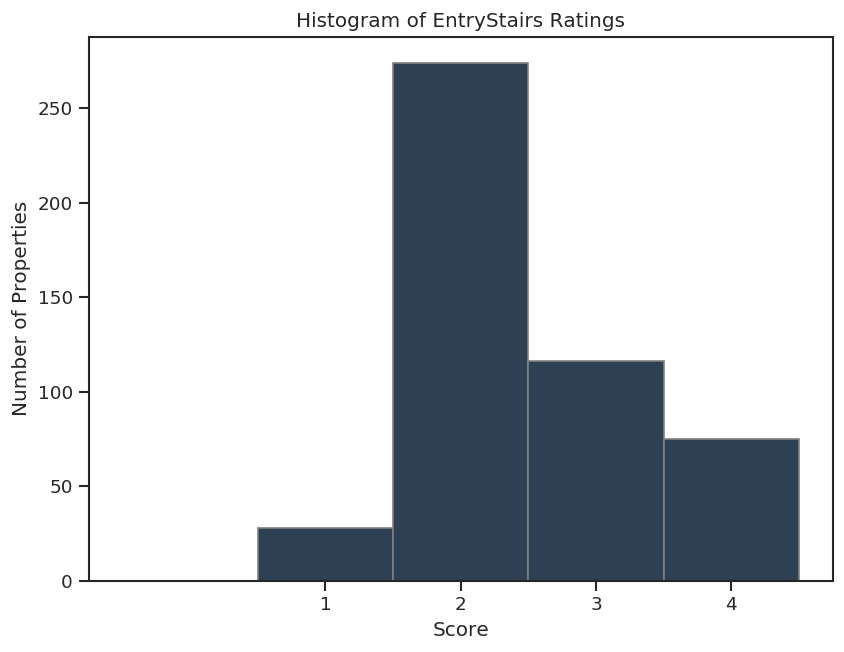

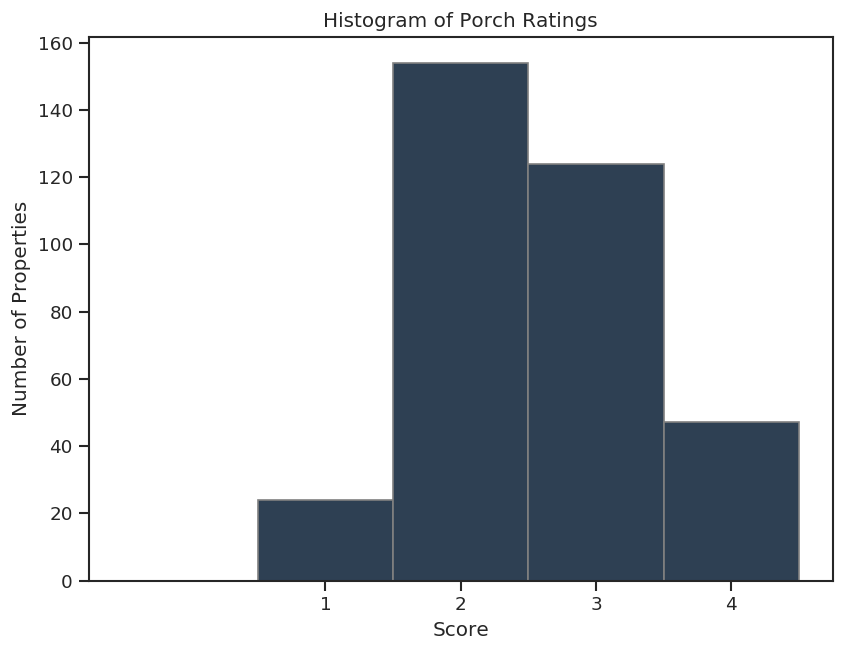

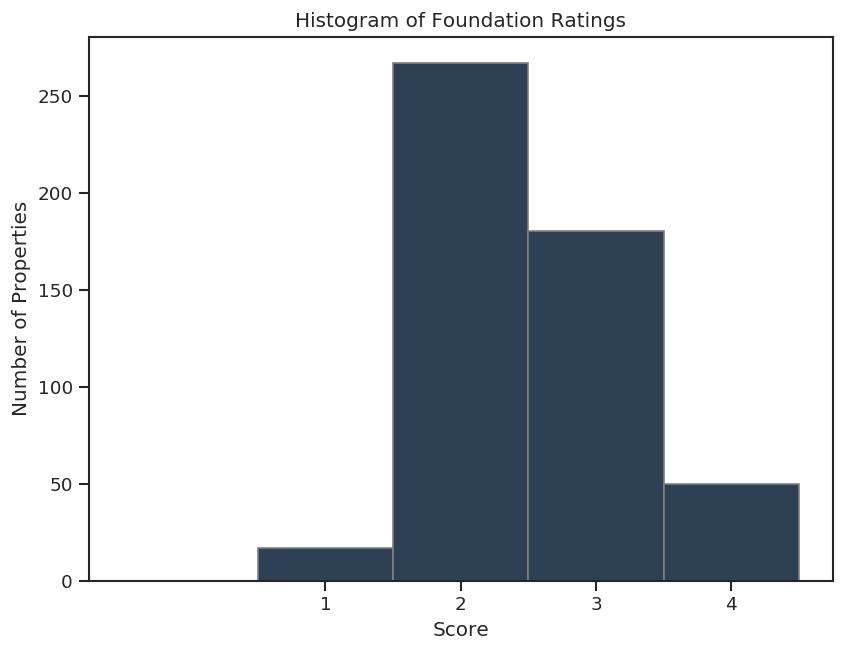

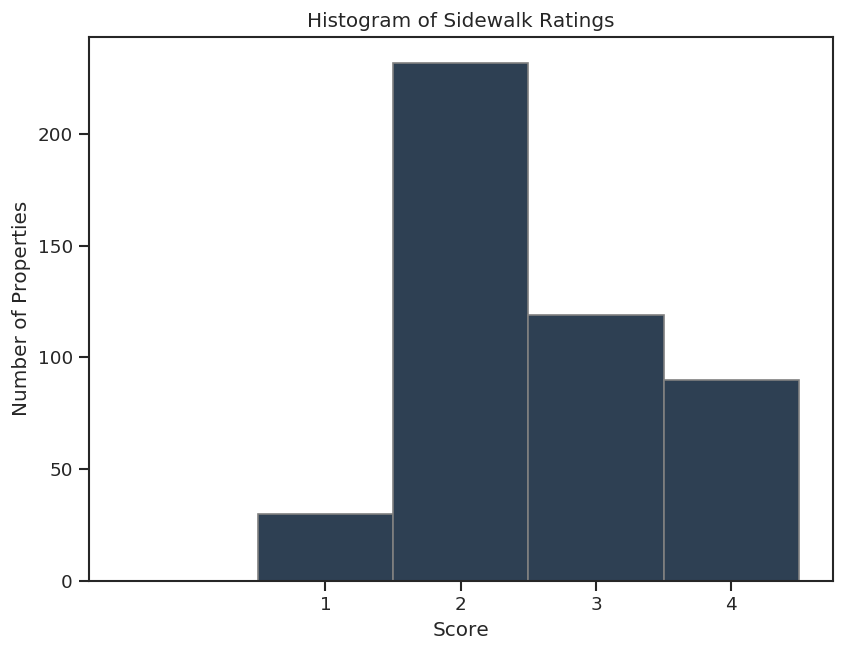

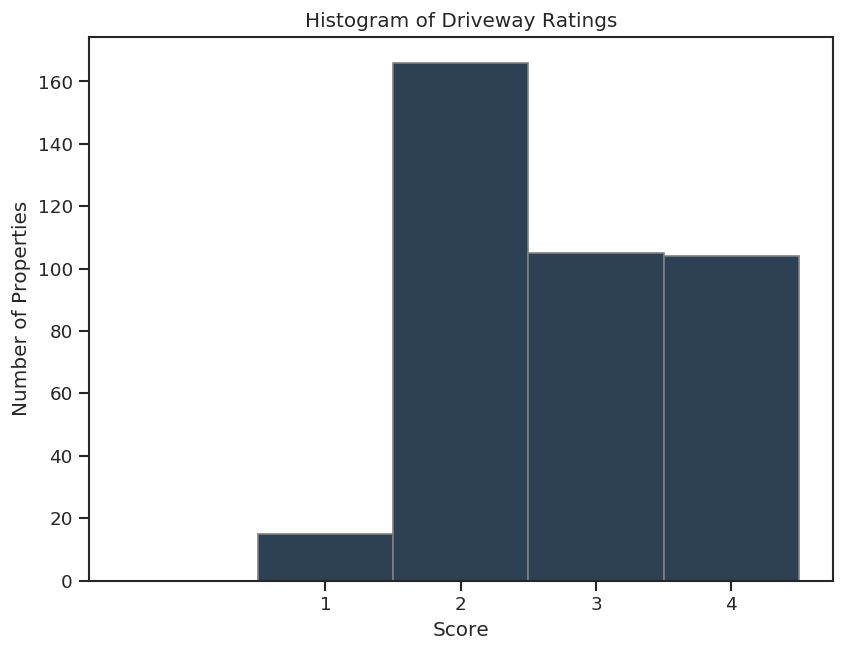

In [0]:
outcomes = df.columns[2:-13]
outcomes

for o in outcomes: 
  plt.hist(df[o], color='#2e4053', edgecolor='grey', bins=np.arange(6)-0.5)
  plt.xlabel("Score")
  plt.ylabel('Number of Properties')
  plt.xticks(range(1, 5))
  plt.title(f"Histogram of {o} Ratings")
  plt.show()



---


##Location of streets in West Bloomington

There are 7 streets from east to west: Morris, Howard, Allin, Low, Mason, Oak, Lee. The other 10 streets are from North to South: Locust, Mulberry, Market, Monroe, Jefferson, Washington, Front, Grove, Olive, Taylor.

#North vs South side of west Bloomington

In [0]:
frameNorth = [locust, mulberry, market, monroe, jefferson]
resultNorth = pd.concat(frameNorth)

frameSouth = [washington, front, grove, olive, taylor]
resultSouth = pd.concat(frameSouth)

In [0]:
result = [resultNorth, resultSouth]
finaldf = pd.concat(result)

## Roof

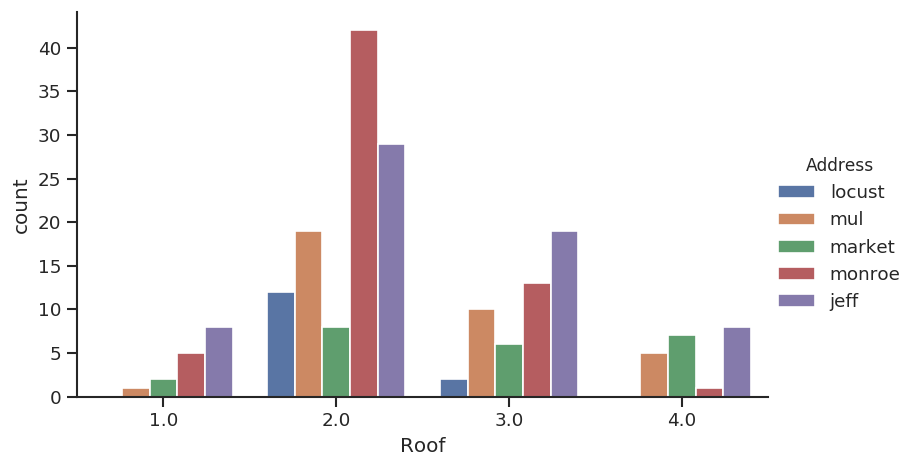

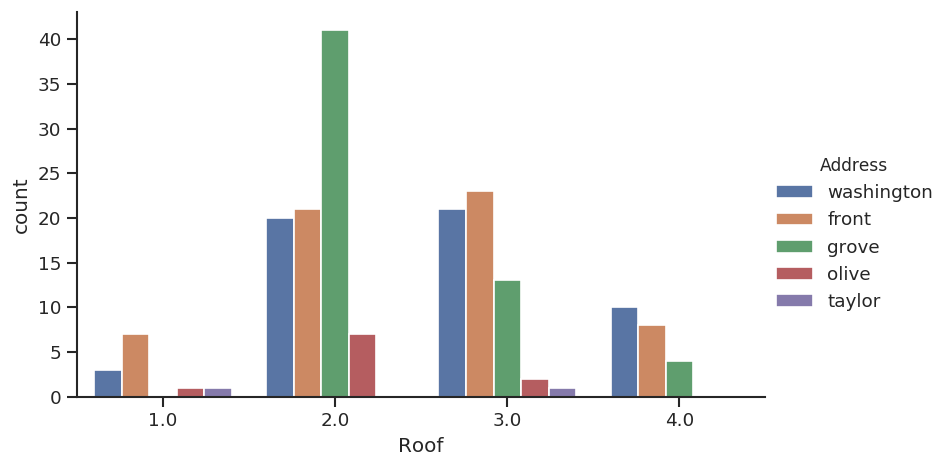

In [50]:

n = sns.catplot(x="Roof", hue="Address", 
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Roof", hue="Address", 
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


## Foundation

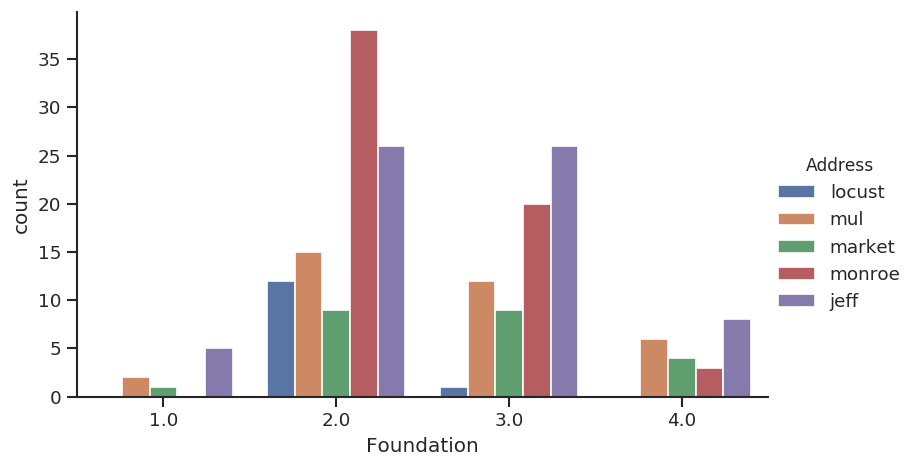

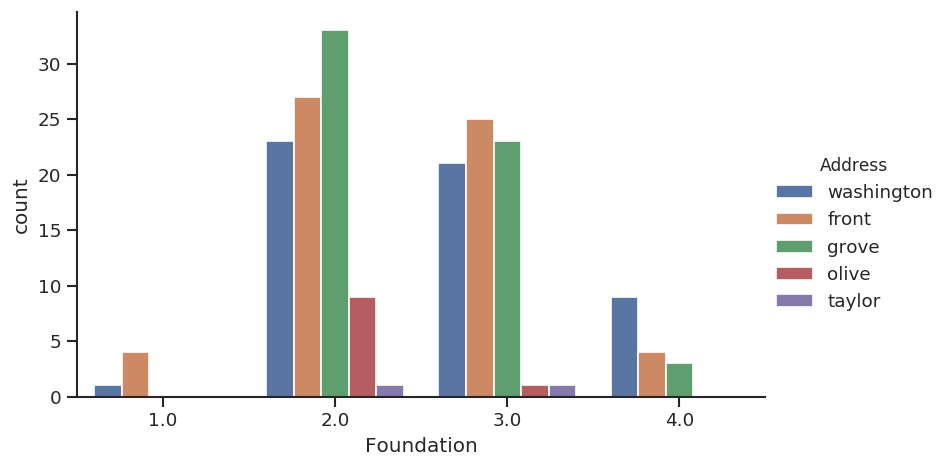

In [0]:
sns.catplot(x="Foundation", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Foundation", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


## Windows

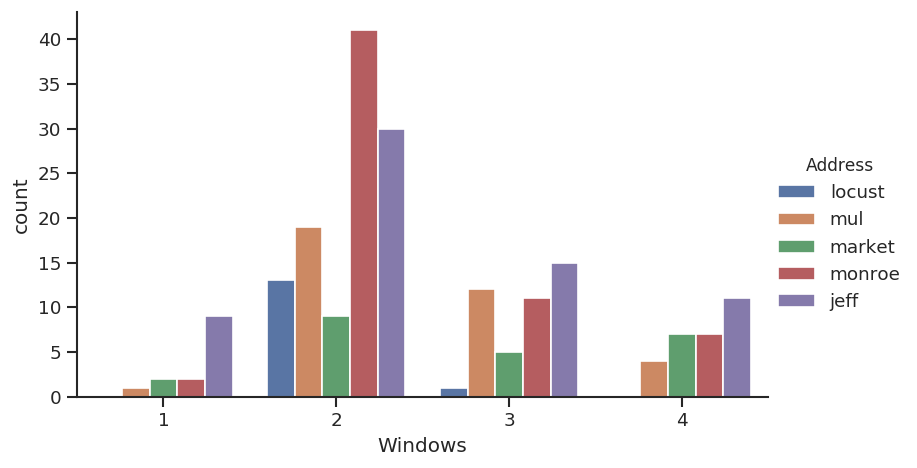

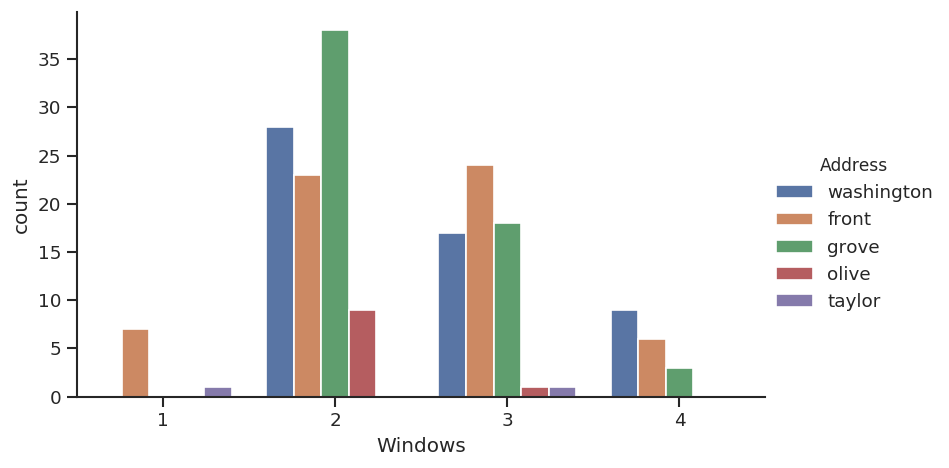

In [0]:
sns.catplot(x="Windows", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Windows", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


##Siding

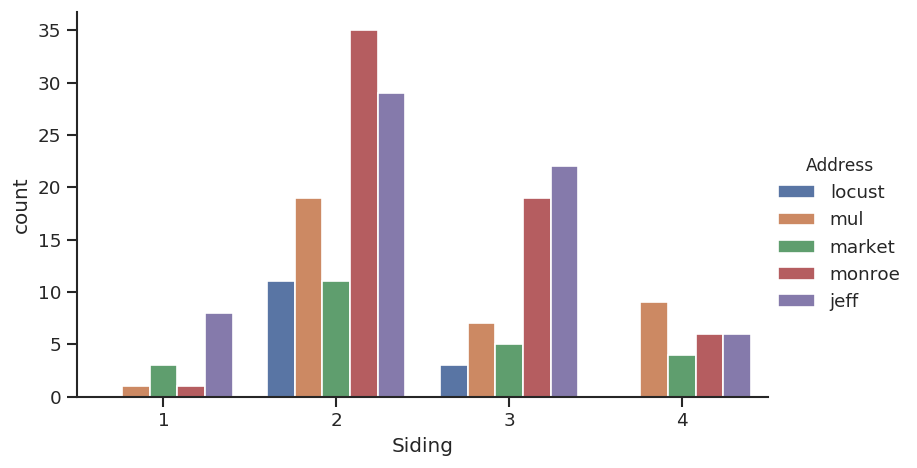

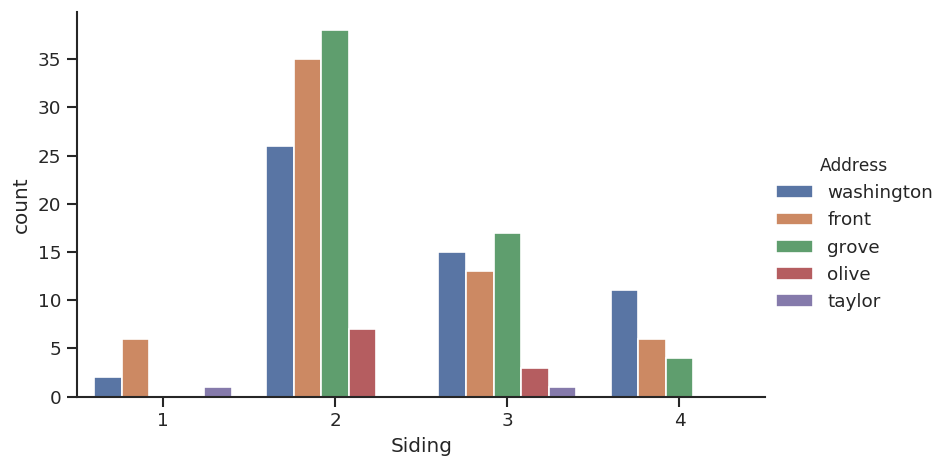

In [0]:
sns.catplot(x="Siding", hue="Address",
                 data=resultNorth, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Siding", hue="Address",
                 data=resultSouth, kind="count",
                 height=4, aspect=1.6);


#East and west side of west Bloomington

In [0]:
frameEast = [morris, howard, allin, low]
resultEast = pd.concat(frameEast)

frameWest = [mason, oak, lee]
resultWest = pd.concat(frameWest)

In [0]:
resultEW = [resultEast, resultWest]
finalEW = pd.concat(resultEW)

##Roof

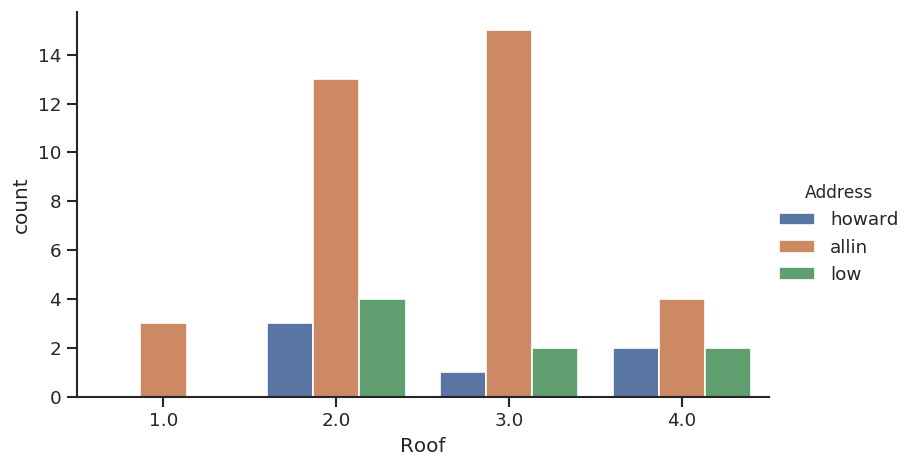

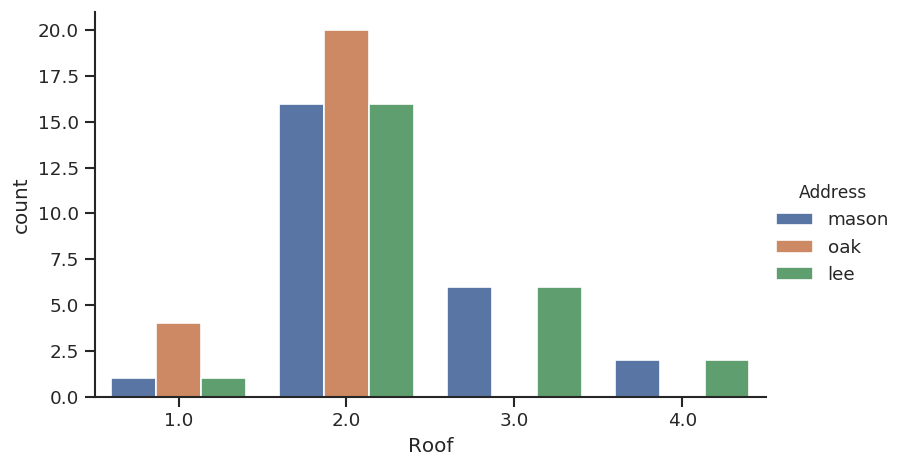

In [49]:

n = sns.catplot(x="Roof", hue="Address", 
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Roof", hue="Address", 
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


##Foundation

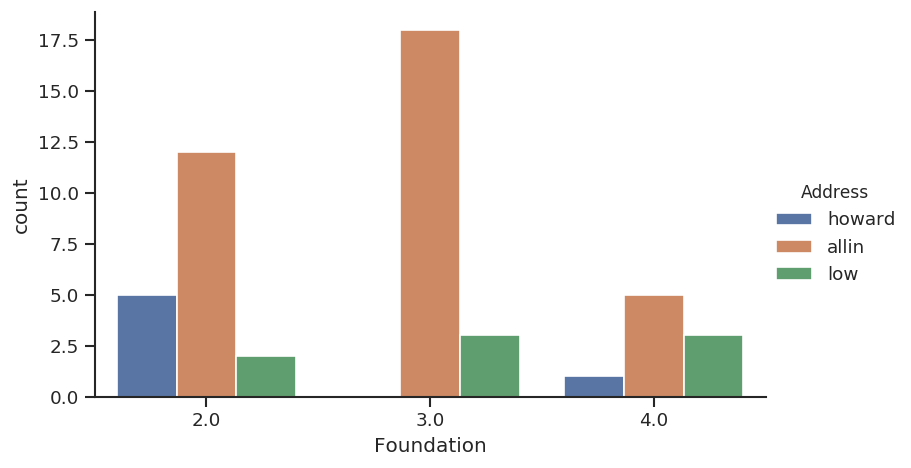

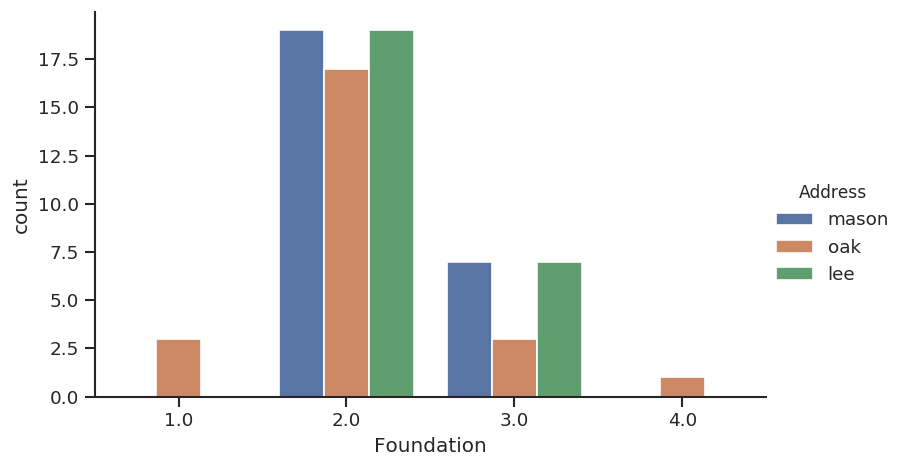

In [48]:

n = sns.catplot(x="Foundation", hue="Address", 
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Foundation", hue="Address", 
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


##Windows

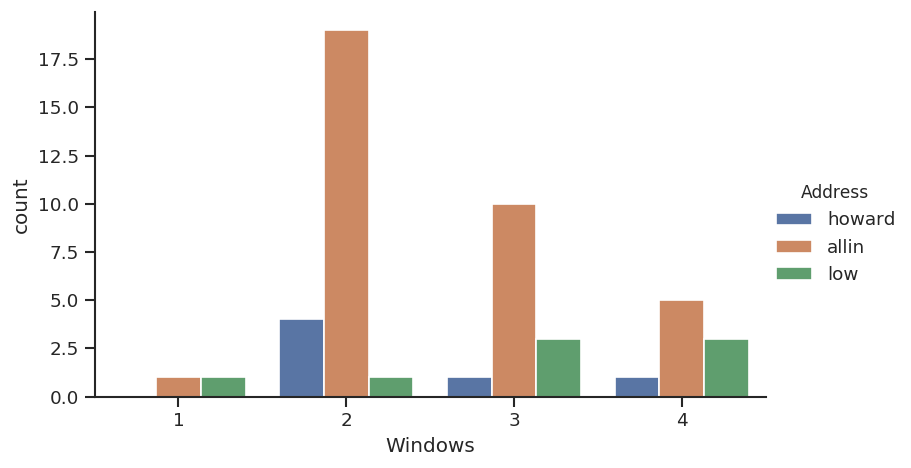

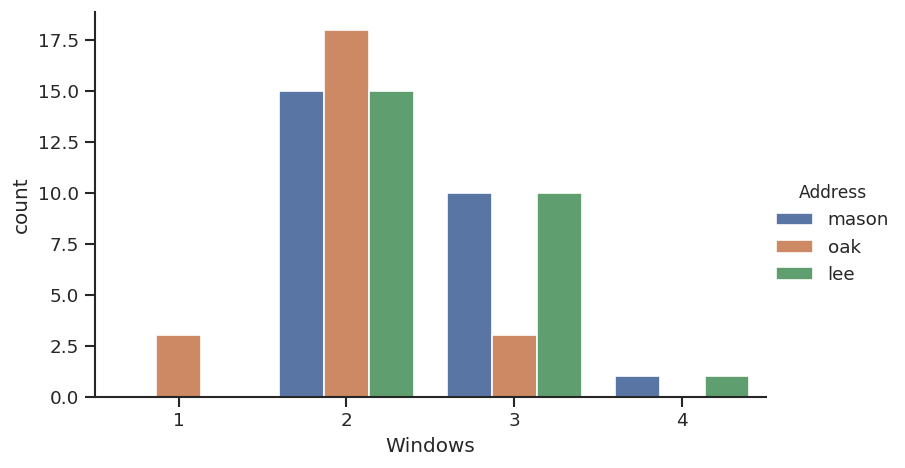

In [47]:

n = sns.catplot(x="Windows", hue="Address", 
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Windows", hue="Address", 
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


##Siding

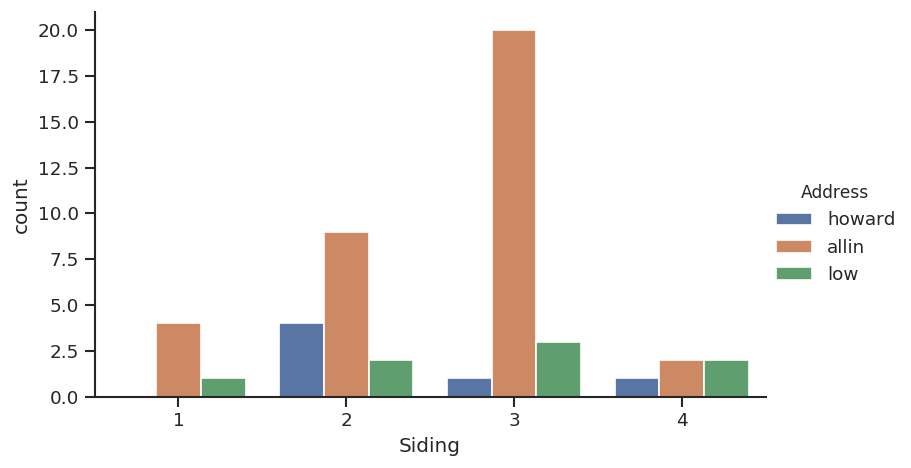

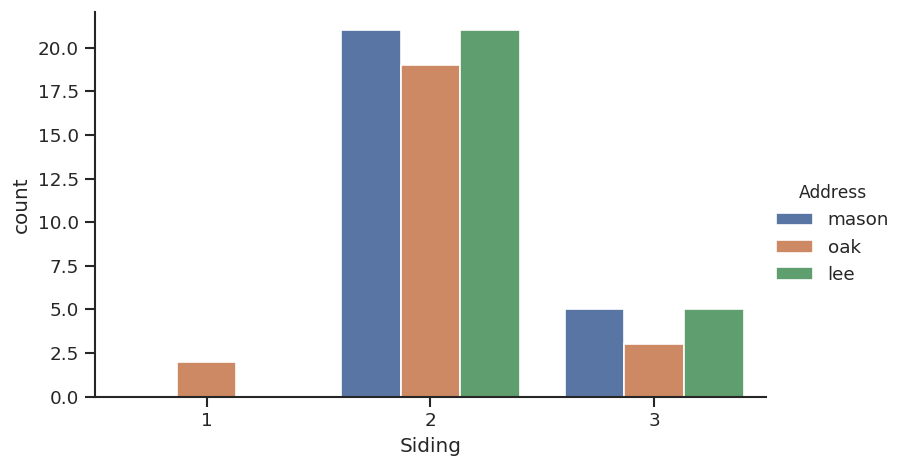

In [46]:
n = sns.catplot(x="Siding", hue="Address", 
                 data=resultEast, kind="count",
                 height=4, aspect=1.6);

sns.catplot(x="Siding", hue="Address", 
                 data=resultWest, kind="count",
                 height=4, aspect=1.6);


##Subplots to compare north and south side properties. 

Note that after dropping the NaN values, a lot of data has been lost. This is because of the way properties were either rated 0 or left blank. I converted all the 0s to NaN at the beginning of this notebook for consistency in the subsequent analysis. If a component did't exist (example, gutter) it was left blank.

In [0]:
#dropping Nans to be able to make subplots
NorthDropped = [locust, mulberry, market, monroe, jefferson]
resultNorthDropped = pd.concat(NorthDropped).dropna()
SouthDropped = [washington, front, grove, olive, taylor]
resultSouthDropped = pd.concat(SouthDropped).dropna()

resultDropped = pd.concat([resultNorthDropped, resultSouthDropped])

resultDropped.describe()

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
count,24.000000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,47492.458333,1.0,1.875000,2.500000,2.541667,2.458333,2.416667,2.291667,2.375000,2.25000,2.416667,2.458333,2.416667,2.916667,0.737500,0.750000,0.483333,0.229167,0.048333,0.04500,0.023750,0.025417,0.024583,0.024167,2.391250
std,19951.287368,0.0,0.797414,0.834058,0.779028,0.779028,0.775532,0.690253,0.824226,0.84699,0.880547,0.779028,0.829702,0.974308,0.233708,0.250217,0.155106,0.069025,0.017611,0.01694,0.008242,0.007790,0.007790,0.008297,0.671036
min,16006.000000,1.0,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.300000,0.300000,0.400000,0.100000,0.020000,0.02000,0.010000,0.010000,0.020000,0.010000,1.620000
25%,21208.500000,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,0.600000,0.600000,0.400000,0.200000,0.040000,0.04000,0.020000,0.020000,0.020000,0.020000,1.960000
50%,55409.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,3.000000,0.600000,0.600000,0.400000,0.200000,0.040000,0.04000,0.020000,0.020000,0.020000,0.020000,1.985000
75%,61611.000000,1.0,2.000000,3.000000,3.000000,3.000000,2.250000,2.250000,3.000000,2.25000,3.000000,3.000000,3.000000,4.000000,0.900000,0.900000,0.450000,0.225000,0.060000,0.04500,0.030000,0.030000,0.030000,0.030000,2.880000
max,74009.000000,1.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,1.200000,1.200000,0.800000,0.400000,0.080000,0.08000,0.040000,0.040000,0.040000,0.040000,3.920000


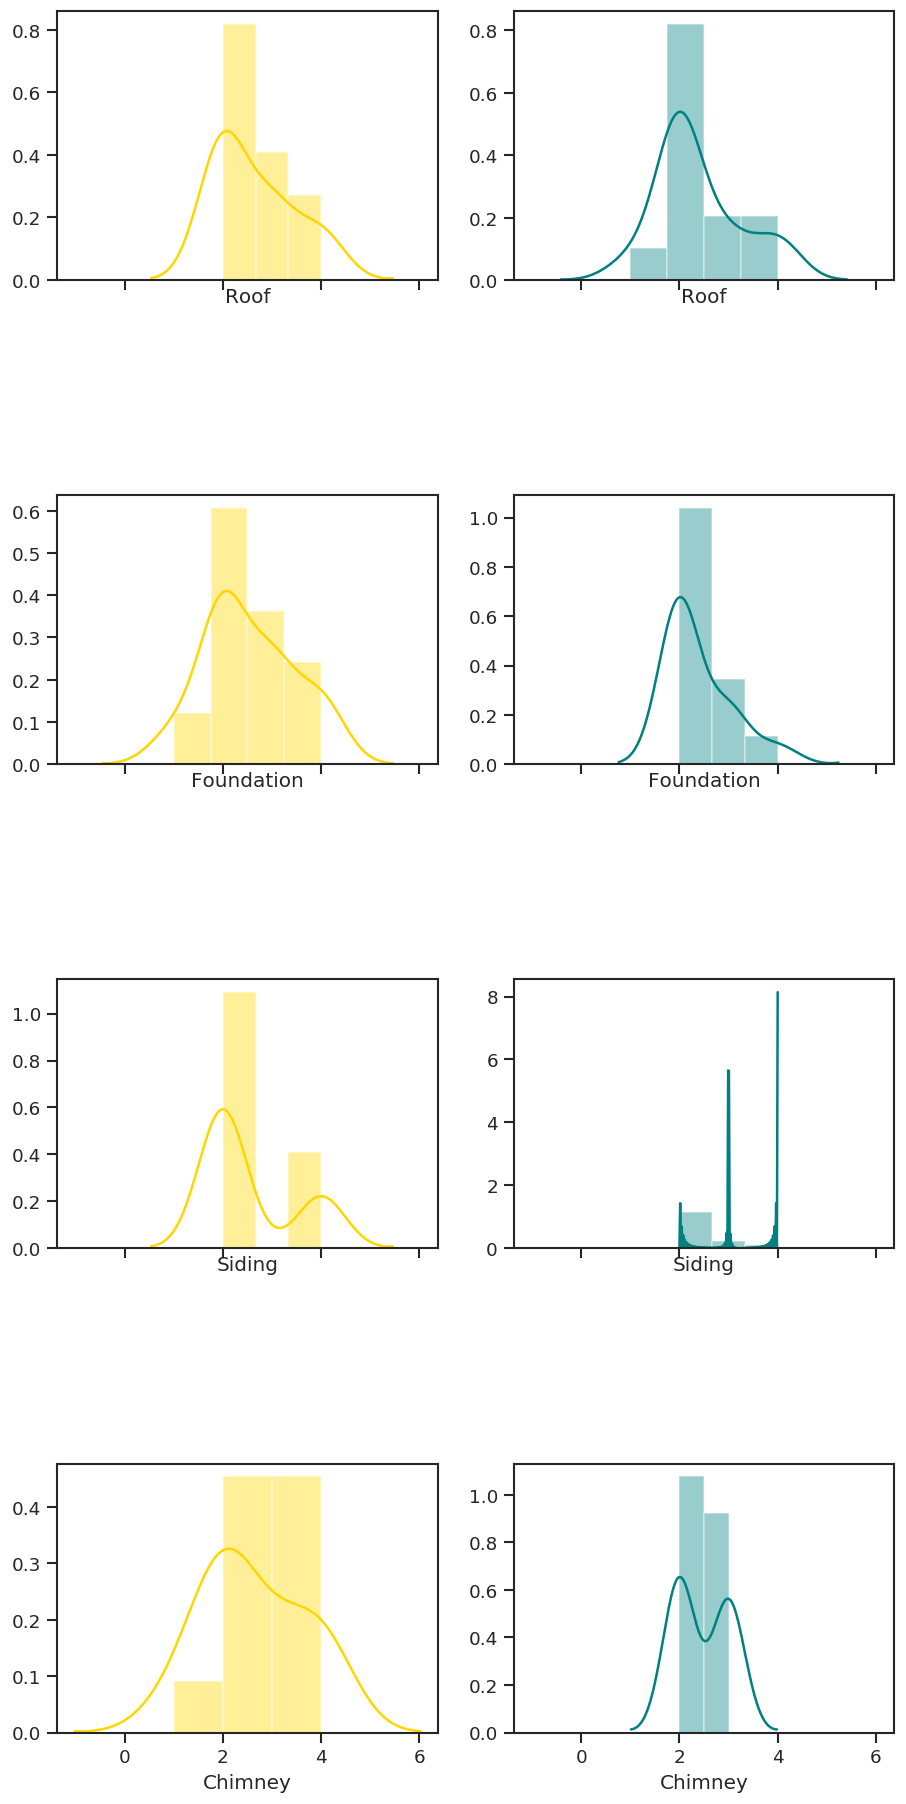

In [0]:
from scipy.stats import norm
f, axes = plt.subplots(4, 2, figsize=(9, 19), sharex=True)
plt.subplots_adjust(hspace = 0.8)

sns.distplot( resultNorthDropped["Roof"] , color="gold", hist=True, ax=axes[0, 0])
sns.distplot( resultSouthDropped["Roof"] , color="teal", hist=True, ax=axes[0, 1])
sns.distplot( resultNorthDropped["Foundation"] , color="gold", hist=True,  ax=axes[1, 0])
sns.distplot( resultSouthDropped["Foundation"] , color="teal", hist=True,  ax=axes[1, 1])
sns.distplot( resultNorthDropped["Siding"] , color="gold", hist=True,  ax=axes[2, 0])
sns.distplot( resultSouthDropped["Siding"] , color="teal", hist=True,  ax=axes[2, 1])
sns.distplot( resultNorthDropped["Chimney"] , color="gold", ax=axes[3, 0])
sns.distplot( resultSouthDropped["Chimney"] , color="teal", ax=axes[3, 1])


#Slicing data for visualizing properties with worst score in each component.

---



In the following section, dropping NaN value got rid of a lot of data so I decided to keep it in the dataframe, however, it does not largely affect the analysis of a particular component. 

##**Foundation**


In [0]:
poor_foundation = df.loc[df['Foundation'] == 4]
poor_foundation.describe()

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
count,50.000000,50.0,50.000000,48.000000,36.000000,47.000000,50.000000,50.000000,47.000000,48.000000,33.000000,50.0,44.000000,31.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44330.000000,1.0,2.000000,3.208333,3.166667,3.255319,3.180000,3.280000,3.489362,3.250000,3.454545,4.0,3.113636,3.419355,1.200000e+00,0.953143,0.636000,0.32800,0.062980,0.064386,0.034346,0.030090,0.032114,0.030485,3.371543
std,17672.518247,0.0,0.782461,0.742576,0.774597,0.765225,0.747513,0.783503,0.655158,0.785507,0.794155,0.0,0.813145,0.764818,1.121495e-15,0.223039,0.149503,0.07835,0.015451,0.015683,0.006715,0.007027,0.007620,0.007823,0.388992
min,16006.000000,1.0,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.0,2.000000,2.000000,1.200000e+00,0.600000,0.400000,0.20000,0.040000,0.040000,0.020000,0.020000,0.020000,0.020000,2.601117
25%,27408.750000,1.0,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.0,2.000000,3.000000,1.200000e+00,0.900000,0.600000,0.30000,0.051117,0.060000,0.030000,0.026034,0.030000,0.025711,3.071788
50%,46212.000000,1.0,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.0,3.000000,4.000000,1.200000e+00,0.900000,0.600000,0.30000,0.060000,0.060000,0.040000,0.030000,0.030000,0.030000,3.323576
75%,62309.500000,1.0,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,1.200000e+00,1.200000,0.800000,0.40000,0.080000,0.080000,0.040000,0.040000,0.040000,0.040000,3.668410
max,72409.000000,1.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,1.200000e+00,1.200000,0.800000,0.40000,0.080000,0.080000,0.040000,0.040000,0.040000,0.040000,3.920000


##**Roof**



In [0]:
df.loc[df['Roof'] == 4].describe()

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
count,57.000000,57.0,57.000000,57.0,40.000000,55.000000,57.000000,57.000000,53.000000,55.000000,43.000000,57.000000,50.00000,38.000000,57.000000,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,45251.894737,1.0,2.210526,4.0,3.350000,3.581818,3.175439,3.192982,3.339623,3.018182,3.255814,3.210526,3.22000,3.368421,0.963158,1.200000e+00,0.635088,0.319298,0.061678,0.059988,0.032860,0.031273,0.035447,0.031403,3.370193
std,18107.524597,0.0,0.939925,0.0,0.662164,0.658025,0.804514,0.766220,0.758120,0.892166,0.819205,0.647436,0.86402,0.819395,0.194231,1.344110e-15,0.160903,0.076622,0.015437,0.017634,0.007566,0.006512,0.006754,0.008363,0.377667
min,12806.000000,1.0,1.000000,4.0,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.00000,1.000000,0.600000,1.200000e+00,0.200000,0.200000,0.040000,0.020000,0.010000,0.020000,0.020000,0.020000,2.596034
25%,26812.000000,1.0,2.000000,4.0,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.00000,3.000000,0.900000,1.200000e+00,0.600000,0.300000,0.051117,0.040000,0.030000,0.026034,0.030000,0.025711,3.131117
50%,49210.000000,1.0,2.000000,4.0,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.50000,4.000000,0.900000,1.200000e+00,0.600000,0.300000,0.060000,0.060000,0.030000,0.030000,0.040000,0.030000,3.390000
75%,61610.000000,1.0,3.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,1.200000,1.200000e+00,0.800000,0.400000,0.080000,0.080000,0.040000,0.040000,0.040000,0.040000,3.610000
max,71608.000000,1.0,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,1.200000,1.200000e+00,0.800000,0.400000,0.080000,0.080000,0.040000,0.040000,0.040000,0.040000,3.920000


##**Siding**


In [0]:
df.loc[df['Siding'] == 4].head()

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,Address,AccessStructureType2,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
37,18412,1,2,4.0,3.0,4.0,4,2,2.0,4.0,4.0,3.0,4.0,3.0,519 W GROVE,NaN,0.9,1.2,0.8,0.2,0.08,0.08,0.02,0.030000,0.040000,0.040000,3.390000
51,19214,1,2,4.0,4.0,4.0,4,4,4.0,3.0,3.0,4.0,NaN,2.0,812 w Washington,Fence,1.2,1.2,0.8,0.4,0.06,0.06,0.04,0.040000,0.040000,0.025711,3.865711
53,19608,1,2,3.0,3.0,2.0,4,4,4.0,4.0,3.0,2.0,4.0,NaN,513 W GROVE,NaN,0.6,0.9,0.8,0.4,0.06,0.08,0.04,0.030000,0.020000,0.040000,2.970000
54,19609,1,2,2.0,NaN,NaN,4,4,4.0,2.0,3.0,3.0,2.0,4.0,515 W GROVE,NaN,0.9,0.6,0.8,0.4,0.06,0.04,0.04,0.026034,0.025229,0.020000,2.911263
86,24809,1,2,3.0,NaN,4.0,4,4,4.0,4.0,4.0,3.0,4.0,NaN,107 S Allin,NaN,0.9,0.9,0.8,0.4,0.08,0.08,0.04,0.026034,0.040000,0.040000,3.306034


##**Windows**


In [0]:
df.loc[df['Windows'] == 4].describe()

,c,Type_,PublicSidewalk,Roof,Chimney,Gutter,Siding,Windows,Screens,EntryStairs,Porch,Foundation,Sidewalk,Driveway,FoundationW,RoofW,SidingW,WindowsW,PorchW,EntryStairsW,ScreensW,ChimneyW,GutterW,SidewalkW,sumW
count,61.000000,61.0,61.000000,60.000000,38.000000,59.00000,61.000000,61.0,59.000000,58.000000,41.000000,61.000000,50.000000,32.000000,61.000000,61.000000,61.000000,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,44337.754098,1.0,2.098361,3.133333,3.289474,3.40678,3.426230,4.0,3.745763,3.189655,3.317073,3.229508,3.180000,3.187500,0.968852,0.936534,0.685246,4.000000e-01,0.061350,0.063098,0.037074,0.030308,0.033778,0.030702,3.246942
std,16620.595832,0.0,0.943485,0.791194,0.731821,0.64644,0.717844,0.0,0.476815,0.826255,0.686987,0.716320,0.896478,0.859013,0.214896,0.236924,0.143569,3.918028e-16,0.013333,0.016399,0.005137,0.006653,0.006551,0.008438,0.472142
min,16405.000000,1.0,1.000000,2.000000,2.000000,2.00000,1.000000,4.0,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.600000,0.600000,0.200000,4.000000e-01,0.040000,0.040000,0.020000,0.020000,0.020000,0.020000,2.225711
25%,28008.000000,1.0,1.000000,2.750000,3.000000,3.00000,3.000000,4.0,4.000000,2.250000,3.000000,3.000000,2.000000,3.000000,0.900000,0.728571,0.600000,4.000000e-01,0.051117,0.049655,0.030000,0.026034,0.030000,0.020000,2.970000
50%,46008.000000,1.0,2.000000,3.000000,3.000000,3.00000,4.000000,4.0,4.000000,3.000000,3.000000,3.000000,3.500000,3.000000,0.900000,0.900000,0.800000,4.000000e-01,0.060000,0.060000,0.040000,0.030000,0.030000,0.030000,3.266034
75%,61610.000000,1.0,2.000000,4.000000,4.000000,4.00000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.200000,1.200000,0.800000,4.000000e-01,0.080000,0.080000,0.040000,0.040000,0.040000,0.040000,3.600000
max,67610.000000,1.0,4.000000,4.000000,4.000000,4.00000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.200000,1.200000,0.800000,4.000000e-01,0.080000,0.080000,0.040000,0.040000,0.040000,0.040000,3.920000


In [0]:
df.mean().round(2)

c                 44609.34
Type_                 1.00
PublicSidewalk        2.09
Roof                  2.43
Chimney               2.60
Gutter                2.52
Siding                2.43
Windows               2.45
Screens               2.58
EntryStairs           2.48
Porch                 2.56
Foundation            2.51
Sidewalk              2.57
Driveway              2.76
FoundationW           0.75
RoofW                 0.73
SidingW               0.49
WindowsW              0.24
PorchW                0.05
EntryStairsW          0.05
ScreensW              0.03
ChimneyW              0.03
GutterW               0.03
SidewalkW             0.03
sumW                  2.42
dtype: float64

In [0]:
oak.count()

c                       24
Type_                   24
PublicSidewalk          24
Roof                    24
Chimney                 22
Gutter                  24
Siding                  24
Windows                 24
Screens                 24
EntryStairs             24
Porch                   14
Foundation              24
Sidewalk                22
Driveway                18
Address                 24
AccessStructureType2     0
FoundationW             24
RoofW                   24
SidingW                 24
WindowsW                24
PorchW                  24
EntryStairsW            24
ScreensW                24
ChimneyW                24
GutterW                 24
SidewalkW               24
sumW                    24
dtype: int64